In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
houses = pd.read_csv('data.csv')
houses.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [3]:
houses.shape

(4600, 18)

In [4]:
houses.dtypes

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
houses.country.value_counts()

USA    4600
Name: country, dtype: int64

In [6]:
houses.statezip.value_counts()

WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: statezip, Length: 77, dtype: int64

In [7]:
"the average price of houses is ${:,.0f}".format(houses.price.mean())

'the average price of houses is $551,963'

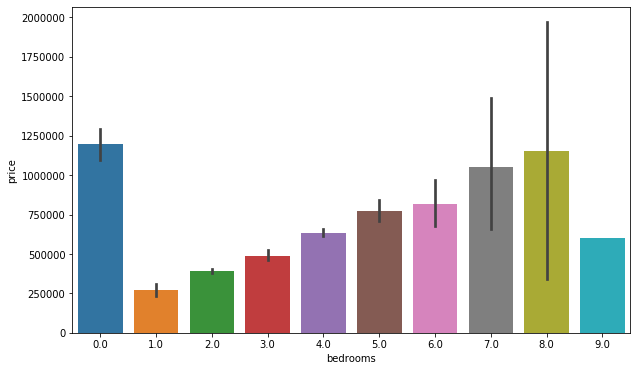

In [8]:
plt.figure(figsize=(10,6))
sns.barplot(x=houses.bedrooms, y=houses['price'])
# it shows some houses doesn't have bedrooms, we need to investgate that 

In [9]:
bedrooms = houses.groupby(['bedrooms']).price.agg([len, min, max])
bedrooms
# so we now see 2 houses have no bedrooms, some houses have price of zero, 1 house have 9 bedrooms which is not good for sample

,len,min,max
bedrooms,,,
0.0,2.0,1095000.0,1295648.0
1.0,38.0,0.0,540000.0
2.0,566.0,0.0,1695000.0
3.0,2032.0,0.0,26590000.0
4.0,1531.0,0.0,4489000.0
5.0,353.0,0.0,7062500.0
6.0,61.0,0.0,3100000.0
7.0,14.0,280000.0,3200000.0
8.0,2.0,340000.0,1970000.0


In [10]:
houses_zero = houses[houses.price == 0]
len(houses_zero)
# there is 49 houses without price 

49

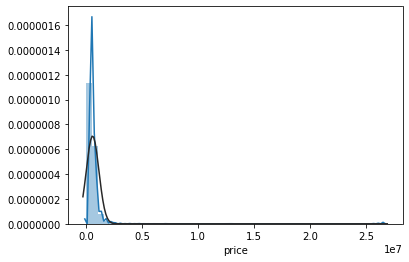

In [11]:
sns.distplot(houses['price'], fit = norm)
# House distribution not normal

In [12]:
new_houses = houses[(houses.price < 2.5*10**7) & (houses.bedrooms>0) & (houses.price>0)].copy()

In [13]:
# log transform the price so that it follows a normal distribution
new_houses['logprice'] = np.log(new_houses['price'])

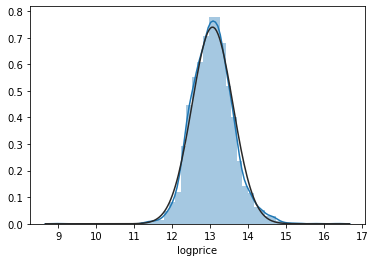

In [14]:
sns.distplot(new_houses['logprice'], fit = norm)

In [15]:
#recode houses with more than 6 bedrooms as 6 bedrooms
new_houses['bedrooms_recoded'] = new_houses['bedrooms'].replace([7,8,9],6)

In [16]:
new_houses['renovated_0_1'] = new_houses['yr_renovated']/new_houses['yr_renovated']
new_houses['renovated_0_1'] = new_houses['renovated_0_1'].fillna(0)

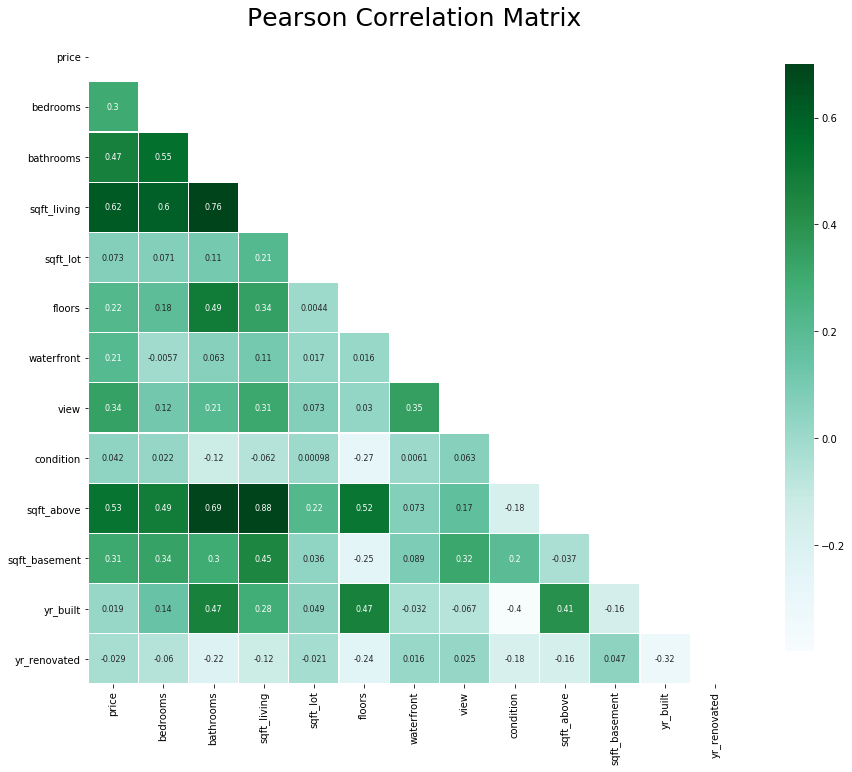

In [17]:
features = ['price','bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated']
mask = np.zeros_like(new_houses[features].corr(), dtype=np.bool) 
mask[np.triu_indices_from(mask)] = True 

f, ax = plt.subplots(figsize=(16, 12))
plt.title('Pearson Correlation Matrix',fontsize=25)

sns.heatmap(new_houses[features].corr(),linewidths=0.25,vmax=0.7,square=True,cmap="BuGn", #"BuGn_r" to reverse 
            linecolor='w',annot=True,annot_kws={"size":8},mask=mask,cbar_kws={"shrink": .9});
